## XL_CarPedDataset_VUB_v2
This dataset contains 7064 frames with different instances of pedestrians and cars.

In this notebook, we will illustrate the content of this dataset.

Let's have a look at the dataset and how it is organized. The data structure is as follows:

XL_CarPedDataset_VUB_v2/
    InstanceMasks/
        xl_instancemasks_session0000_00000006.vis.png
        xl_instancemasks_session0000_00000010.vis.png
        xl_instancemasks_session0000_00000014.vis.png
        xl_instancemasks_session0000_00000018.vis.png
        ...
    LabelMasks/
        xl_labelmasks_session0000_00000006.vis.png
        xl_labelmasks_session0000_00000010.vis.png
        xl_labelmasks_session0000_00000014.vis.png
        xl_labelmasks_session0000_00000018.vis.png
        ...
    PointClouds/
        xw_pointcloud_session0000_00000006.xpc
        xw_pointcloud_session0000_00000010.xpc
        xw_pointcloud_session0000_00000014.xpc
        xw_pointcloud_session0000_00000018.xpc
        ...
    VisualImages/ (<-- only few examples of visual images)
        xl_visual_session0000_00002010.vis.png

Here is one example of a frame in the dataset, with its corresponding instance segmentation mask, label mask, and point cloud.

In [1]:
import os
os.chdir('C:/Users/nisha/MACS/Internship/Data/')
import XenoWareFormat as xw

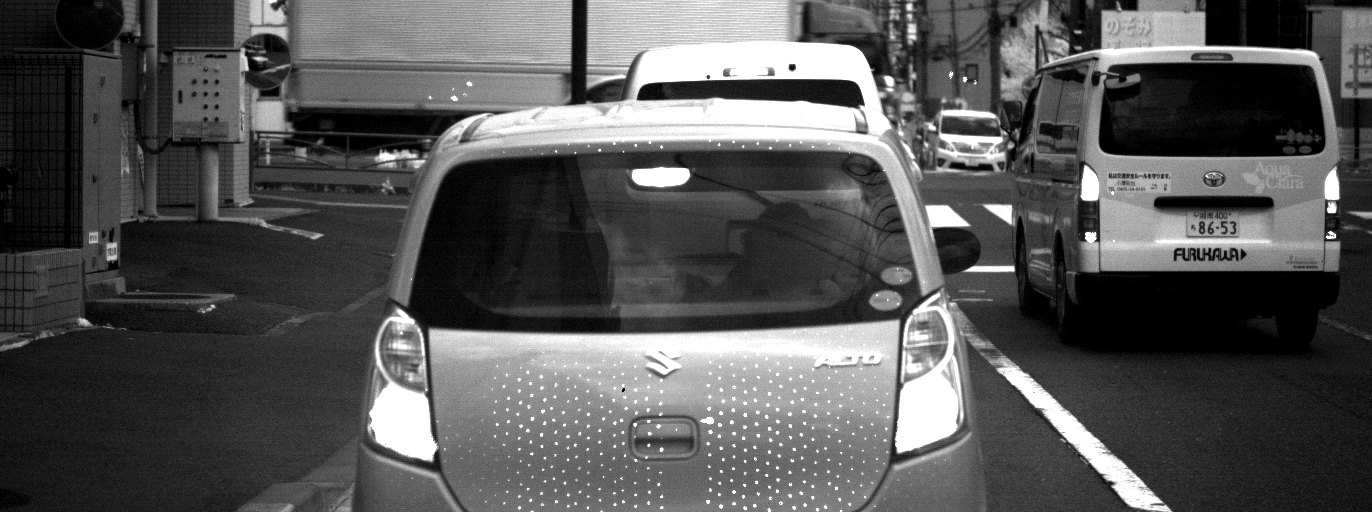

In [7]:
from PIL import Image
visual_image = Image.open('C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/train/VisualImages/xl_visual_session0005_00001364.png')
visual_image

In [8]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
img = cv2.imread('C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/train/Detection_FasterRCNN/xl_visual_session0000_00000285.png',0)
img1 = imutils.resize(img)
# img2 = img1[197:373,181:300]  #roi of the image

# indices = np.where(img1!= [0])
# coordinates = zip(indices[1], indices[0])
# c = tuple(coordinates)

In [4]:
c[int(len(c)/2)]

(65, 252)

In [1]:
instances_mask = Image.open('C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/val/InstanceMasks/xl_instancemasks_session0005_00007199.vis.png')
# each instance has a different index value, from zero to N, where
# N is the number of instances. In order to make visualization easier,
# let's add a color palette to the mask.
instances_mask.putpalette([
    0, 0, 0,     # black background
    255, 0, 0,   # instance 1 is red
    255, 255, 0, # instance 2 is yellow
    255, 153, 0, # instance 3 is orange
    0, 255, 0,   # instance 4 is green
    0, 0, 255,   # instance 5 is blue
])
instances_mask

NameError: name 'Image' is not defined

In [ ]:
labels_mask = Image.open('E:/data/XenomatiX/Neural network data/To VUB/XL_CarPedDataset_VUB_v2/LabelMasks/xl_labelmasks_session0000_00002010.vis.png')
# each label has a different index value, from zero to N, where
# N is the number of labels. Here, we have only 3 labels: 0-background, 1-pedestrian, 2-car
# In order to make visualization easier,
# let's add a color palette to the mask.
labels_mask.putpalette([
    0, 0, 0,     # black background
    255, 0, 0,   # index 1 is red     (pedestrian)
    255, 255, 0, # index 2 is yellow  (car)
])
labels_mask

x [mm], y [mm], z [mm], intensity, u [px], v [px], distance [mm]
[ 2.5593703e+04 -6.4563457e+03 -2.5341548e+03  2.7512605e+06
  2.6856823e+01  1.2983251e+01  2.6746736e+04  0.0000000e+00
  0.0000000e+00  0.0000000e+00 -9.9990000e+03  0.0000000e+00
  0.0000000e+00]
Point cloud shape: (4678, 13)


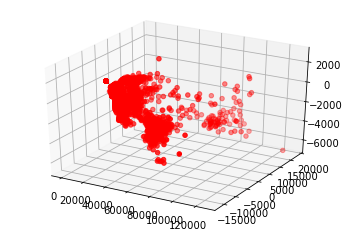

In [10]:
# load the corresponding point cloud

import XenoWareFormat as xw

# read XenomatiX's point cloud
(c,m) = xw.XW_ReadFile("C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/train/PointClouds/xw_pointcloud_session0005_00001364.xpc")

# get data
pc = c["data"]


# a point cloud is defined as Nx7 matrix, where N is the number of points and the 7 columns correspond to:
# x [mm], y [mm], z [mm], intensity, u [px], v [px], distance [mm]

print("x [mm], y [mm], z [mm], intensity, u [px], v [px], distance [mm]")
print(pc[1,:])

print("Point cloud shape:", pc.shape)

# plot the 3D point cloud

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pc[:,0], pc[:,1], pc[:,2], c='r')
plt.show()

In [13]:
# i,j,k = np.array(c["data"]).T
# x,y,z = np.array(m).T
import numpy as np
cv= pc[:,6]

print(np.mean(cv))

[-1.0000000e+00  8.6566477e+04  4.6495324e+04 ...  1.1565361e+04
  1.1305664e+04  1.1204575e+04]


In [30]:
pc

array([[ 3.09938320e+04, -6.76766553e+03, -1.76638135e+03, ...,
         1.27511375e+02,  1.03150129e+01,  3.22444023e+04],
       [ 3.01141426e+04, -6.46429199e+03, -1.78821826e+03, ...,
         1.37414169e+02,  8.35694122e+00,  3.13209375e+04],
       [ 2.93701660e+04, -6.19156445e+03, -1.73537903e+03, ...,
         1.47708649e+02,  1.26880598e+01,  3.05364961e+04],
       ...,
       [ 1.06234336e+04,  2.87004688e+03,  4.04464783e+02, ...,
         1.40588989e+03,  4.98622467e+02,  1.16755518e+04],
       [ 1.06364688e+04,  2.91626025e+03,  3.96513184e+02, ...,
         1.41584509e+03,  4.96022675e+02,  1.16980303e+04],
       [ 1.05426309e+04,  2.95095947e+03,  3.99111786e+02, ...,
         1.42947253e+03,  5.00292572e+02,  1.16176553e+04]], dtype=float32)

In [22]:
import numpy as np
c = pc[:,6][:]
d = c[:]

40281.332

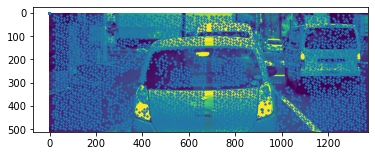

In [16]:
# We can plot u [px] and v [px] on top of the visual image and the instances mask
import cv2

plt.figure()
plt.imshow(visual_image)
plt.scatter(pc[:,4], pc[:,5], s=2)
# plt.show()
plt.savefig('C:/Users/nisha/MACS/Internship/Data/pc.png',bbox_inches='tight', dpi=200)

# cv2.imwrite('C:/Users/nisha/MACS/Internship/Data/pc.png',visual_image)


In [150]:
(pc[1])

array([ 3.5087840e+04, -8.8038105e+03, -3.0013599e+03,  1.4622986e+06,
        2.7950434e+01,  1.2812718e+01,  3.6537930e+04,  0.0000000e+00,
        0.0000000e+00,  0.0000000e+00, -9.9990000e+03,  0.0000000e+00,
        0.0000000e+00], dtype=float32)

In [19]:
import numpy as np
import open3d as o3d

In [31]:
input_path="C:/Users/nisha/MACS/Internship/Data/sample.xyz"
output_path="C:/Users/nisha/MACS/Internship/Data/"
# dataname="sample.xyz"
point_cloud= np.loadtxt(input_path,skiprows=1)

In [220]:
pntcld = pc
# pntcld = point_cloud

pcd = o3d.geometry.PointCloud()
# pcd.points = o3d.utility.Vector3dVector(pntcld[:,:3])
pcd.points = o3d.utility.Vector3dVector(P_inside[:,:3])
# pcd.colors = o3d.utility.Vector3dVector(point_cloud[:,3:6]/255)
# pcd.normals = o3d.utility.Vector3dVector(point_cloud[:,6:9])

In [221]:
o3d.visualization.draw_geometries([pcd])

In [217]:
cloud_points.shape

(1797, 13)

In [15]:
import os
from os import listdir
import glob
import numpy as np

import XenoWareFormat as xw

# 3D dimension per object

def dimension_3d(_points):    
    x_min = min(_points[:,0])
    x_max = max(_points[:,0])  
    y_min = min(_points[:,1])
    y_max = max(_points[:,1])  
    z_min = min(_points[:,2])
    z_max = max(_points[:,2])  
    
    return(x_min,x_max,y_min,y_max,z_min,z_max)


# Saving 3D point clouds in a text file
# Format - 3d distance(mean or median),3D dimension (xmin, xmax, ymin, ymax, zmin, zmax), number of points for each object.


# gt_path = "C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/val/groundtruth_txt/"
# detection_path = "C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/val/detection_txt/"
train_path = "C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/train/label_FasterRCNN/"
# pt_cloud = "C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/train/pointcloud_txt_gt/"
cloud_path = "C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/train/PointClouds/xw_pointcloud"
data=[]

os.chdir(train_path)
files = glob.glob("*.txt")
files.sort()

for f in files:
    points = {}
    non_grounds = []
    catg=[]
    nameOfImage = f.replace(".txt", "")
    #count the number of objects in an image
    count=0
    fh1 = open(f, "r")
    
    # read XenomatiX's point cloud
    cloud_file = cloud_path+f[9:30]+'.xpc'
    
    (c,m) = xw.XW_ReadFile(cloud_file)
    
    pc = c["data"]
    
    uvs_ground,uvs_nonground = get_ground_points(pc)
    
#     u_ground = uvs_ground[:,0]
#     v_ground = uvs_ground[:,1]
    u_nonground = uvs_nonground[:,0]
    v_nonground = uvs_nonground[:,1]
    
    for line in fh1:                
        nonground_count=0
        ground_count=0
        line = line.replace("\n", "")
        if line.replace(' ', '') == '':
            continue
        splitLine = line.split(",")            

        x = float(splitLine[0])
        y = float(splitLine[1])
        w = float(splitLine[2])
        h = float(splitLine[3])
#         catg.append(splitLine[4])
        
        #compare 2d distance in 3d point cloud with 2d detection boxes in dataset and chek what all cloud 
        #points lies inside box
        for i in pc:
            u = i[4]
            v = i[5]                                                    
            
            #add all the points that lies within a particular image
#             if (u>=x and u<=w) and (v>=y and v<=h):
#                 if count in points:
#                     points[count].append(i)
#                 else:
#                     points[count] = [i]
                    
            if u in u_nonground and v in v_nonground:                    
                nonground_count+=1
                    
#                 if u in u_ground and v in v_ground:
#                     ground_count+=1
        
#         non_grounds.append(nonground_count)
#         count+=1
                
        data.append([nameOfImage,nonground_count])

#     labels_path = pt_cloud+f
#     f1= open(labels_path,"w+")
#     for obj in range(count):
#         if obj in points.keys():                        
#             #3D distance is at 6th position
#             distance_slice = np.array(points[obj])[:,6]
#             intensity_slice = np.array(points[obj])[:,3]
#             distance = np.mean(distance_slice)
#             intensity = np.mean(intensity_slice)
#             x1,x2,y1,y2,z1,z2 = dimension_3d(np.array(points[obj]))            
# #             print(obj,distance,x1,x2,y1,y2,z1,z2,non_grounds[obj],len(points[obj]),int(catg[obj]))        
#             f1.write("%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%d,%d,%d\r" % (distance,intensity,x1,x2,y1,y2,z1,z2,non_grounds[obj],len(points[obj]),int(catg[obj])))
#         else:            
#             f1.write("%.2d,%.2d,%.2d,%.2d,%.2d,%.2d,%.2d,%.2d,%d,%d,%d\r" % (-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,int(catg[obj])))
    
#     f1.close()
  

In [20]:
import os
from os import listdir
import glob
import numpy as np

import XenoWareFormat as xw

gt_path = "C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/train/groundtruth_txt/"
cloud_path = "C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/train/PointClouds/xw_pointcloud"

os.chdir(gt_path)
files = glob.glob("xl_visual_session0005_00009089.txt")
files.sort()
P_inside = []

for f in files:
    points = {}
    catg=[]
    count=0
    fh1 = open(f, "r")
    
    # read XenomatiX's point cloud
    cloud_file = cloud_path+f[9:30]+'.xpc'
    
    (c,m) = xw.XW_ReadFile(cloud_file)
    
    pc = c["data"]
    
    for line in fh1:
        count+=1        
        line = line.replace("\n", "")
        if line.replace(' ', '') == '':
            continue
        splitLine = line.split(",")            

        x = float(splitLine[0])
        y = float(splitLine[1])
        w = float(splitLine[2])
        h = float(splitLine[3])
        catg.append(splitLine[4])
        
        for i in pc:
            u = i[4]
            v = i[5]            
            
            if (u>x and u<w) and (v>y and v<h):                                
                if len(P_inside)==0:
                    P_inside = [i]
                else:                    
                    P_inside = np.append(P_inside,[i],axis=0)
                    
                    

In [21]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
# plt.figure()
# plt.imshow(visual_image)
# plt.scatter(P_inside[:,4], P_inside[:,5], s=2, c='r')
# plt.show()

# read visual image
visual_image = cv2.imread('C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/train/Detection_FasterRCNN/xl_visual_session0005_00009089.png')

# convert to color image
# visual_image = cv2.cvtColor(visual_image, cv2.COLOR_GRAY2BGR)


for i in range(len(P_inside)):
    u = int(P_inside[i,4])
    v = int(P_inside[i,5])

    cv2.circle(visual_image, (u,v), 1, (255,0,0), 2)

cv2.imwrite('C:/Users/nisha/MACS/Internship/Data/test1.png',visual_image)


True

In [8]:
import random

def run_ransac(data, estimate, is_inlier, sample_size, goal_inliers, max_iterations, stop_at_goal=True, random_seed=None):
    best_ic = 0
    best_model = None
    random.seed(random_seed)
    # random.sample cannot deal with "data" being a numpy array
    data = list(data)
    for i in range(max_iterations):
        s = random.sample(data, int(sample_size))
        m = estimate(s)
        ic = 0
        for j in range(len(data)):
            if is_inlier(m, data[j]):
                ic += 1

#         print(s)
#         print('estimate:', m,)
#         print('# inliers:', ic)

        if ic > best_ic:
            best_ic = ic
            best_model = m
            if ic > goal_inliers and stop_at_goal:
                break
#     print('took iterations:', i+1, 'best model:', best_model, 'explains:', best_ic)
    return best_model, best_ic


In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import cv2
import XenoWareFormat as xw

def augment(xyzs):
    axyz = np.ones((len(xyzs), 4))
    axyz[:, :3] = xyzs
    return axyz

def estimate(xyzs):
    axyz = augment(xyzs[:3])
    return np.linalg.svd(axyz)[-1][-1, :]

def is_inlier(coeffs, xyz, threshold):
    return np.abs(coeffs.dot(augment([xyz]).T)) < threshold

def get_ground_points(pc):

    # test data
    vis_filename = "C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/train/Detection_FasterRCNN/xl_visual_session0000_00000285.png"
    pc_filename  = "C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/train/PointClouds/xw_pointcloud_session0000_00000285.xpc"
    
    # read visual image
    vis_image = cv2.imread(vis_filename)

    # convert to color image
#     vis_image = cv2.cvtColor(vis_image, cv2.COLOR_GRAY2BGR)
    
    # read point cloud
    [c,_] = xw.XW_ReadFile(pc_filename)
    
    pointcloud = pc      
    
    xyzIuvs = pointcloud[:,:6]
    
    #remove nan data
    xyzIuvs = xyzIuvs[~np.isnan(xyzIuvs).any(axis=1)]
    

    # copy the xyz coordinates
    xyzs = xyzIuvs[:,0:3]/1000 # convert [mm] to [m]

    # copy the uv coordinates
    uvs  = xyzIuvs[:,4:6] # in pixels    
    
    # flip y and z coordinates
    xyzs[:,1:3] = -xyzs[:,1:3]
    
    n = xyzs.shape[0] # number of points

    # parameters
    max_iterations = 50
    inlier_threshold_m = 0.1 # inlier threshold in [m]
    goal_inliers = n * 0.3

    # RANSAC
    m, b = run_ransac(xyzs, estimate, lambda x, y: is_inlier(x, y, inlier_threshold_m), 3, goal_inliers, max_iterations, stop_at_goal=False)
    a, b, c, d = m

    # mask to show inliers in yellow
    ground_mask = np.zeros((n,), dtype=int)

    for i in range(n):
        if is_inlier(m,xyzs[i,:],inlier_threshold_m):
            ground_mask[i] = 1

    ground_mask = ground_mask > 0

    # 3D plotting    
    #fig = plt.figure()
    #ax = mplot3d.Axes3D(fig)

    #ax.scatter3D(xyzs.T[0], xyzs.T[1], xyzs.T[2])


    # # plotting
    # xx, yy, zz = plot_plane(a, b, c, d)
    # #ax.plot_surface(xx, yy, zz, color=(0, 1, 0, 0.5))
    # ax.scatter3D(xyzs[~ground_mask].T[0], xyzs[~ground_mask].T[1], xyzs[~ground_mask].T[2], 'bo')
    # ax.scatter3D(xyzs[ground_mask].T[0], xyzs[ground_mask].T[1], xyzs[ground_mask].T[2], 'ro')

    # plt.show()        

    # 2D plotting
    # plot ground points and non ground points on top of visual image
    uvs_ground    = uvs[ground_mask]
    uvs_nonground = uvs[~ground_mask]
    
#     return(uvs_ground,uvs_nonground)
    
#     print(len(uvs_ground),len(uvs_nonground))
    
#     # draw ground points
    for i in range(uvs_ground.shape[0]):
        u_ground = int(uvs_ground[i,0])
        v_ground = int(uvs_ground[i,1])

        cv2.circle(vis_image, (u_ground,v_ground), 1, (255,0,0), 2)

    # draw non ground points
    for i in range(uvs_nonground.shape[0]):
        u_nonground = int(uvs_nonground[i,0])
        v_nonground = int(uvs_nonground[i,1])
        
        cv2.circle(vis_image, (u_nonground,v_nonground), 1, (0,255,0), 2)
        
    cv2.imwrite('C:/Users/nisha/MACS/Internship/Data/test.png',vis_image)


    plt.figure()
    plt.imshow(vis_image)
    plt.show()


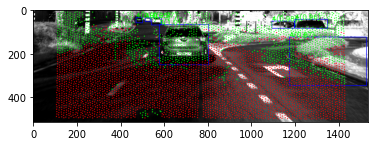

In [16]:
get_ground_points(pc)

### Update truth boxes

In [31]:
import os
from os import listdir
import glob
import numpy as np

pt_cloud = "C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/val/pointcloud_txt_detection/"
pt_cloud_temp = "C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/val/pointcloud_txt_detection_temp/"

os.chdir(pt_cloud)
files = glob.glob("*.txt")
files.sort()
P_inside = []

for f in files:
    fh1 = open(f, "r")
    catg = []
    res_values = []
    for line in fh1:               
        line = line.replace("\n", "")
        if line.replace(' ', '') == '':
            continue
        splitLine = line.split(",")            

        distance = float(splitLine[0])
        intensity = float(splitLine[1])
        x_min = float(splitLine[2])
        x_max = float(splitLine[3])
        y_min = float(splitLine[4])
        y_max = float(splitLine[5]) 
        z_min = float(splitLine[6])
        z_max = float(splitLine[7])
        non_ground = splitLine[8]
        num = splitLine[9]
        catg = splitLine[10]
                
        res_values.append([distance,intensity,x_min,x_max,y_min,y_max,z_min,z_max,non_ground,num,catg])                                   
    
    labels_path = pt_cloud_temp+f 
    
    f1= open(labels_path,"w+")
    if catg:
        temp = catg[0]
        del catg[0]
        catg.append(temp)
        
        for pos,val in enumerate(res_values):                
            if val[8] != '-1':
                f1.write("%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%.2f,%d,%d,%d\r" % (val[0],val[1],val[2],val[3],val[4],val[5],
                                                                            val[6],val[7],int(val[8]),int(val[9]),int(catg[pos])))
            else:
                f1.write("%.2d,%.2d,%.2d,%.2d,%.2d,%.2d,%.2d,%.2d,%d,%d,%d\r" % (-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,int(catg[pos])))

    f1.close()
        
        
        

In [26]:
import numpy as np
def calc_iou( gt_bbox, pred_bbox):
    '''
    This function takes the predicted bounding box and ground truth bounding box and 
    return the IoU ratio
    '''
    x_topleft_gt, y_topleft_gt, x_bottomright_gt, y_bottomright_gt= gt_bbox
    x_topleft_p, y_topleft_p, x_bottomright_p, y_bottomright_p= pred_bbox
    
    if (x_topleft_gt > x_bottomright_gt) or (y_topleft_gt> y_bottomright_gt):
        raise AssertionError("Ground Truth Bounding Box is not correct")
    if (x_topleft_p > x_bottomright_p) or (y_topleft_p> y_bottomright_p):
        raise AssertionError("Predicted Bounding Box is not correct",x_topleft_p, x_bottomright_p,y_topleft_p,y_bottomright_gt)
        
         
    #if the GT bbox and predcited BBox do not overlap then iou=0
    if(x_bottomright_gt< x_topleft_p):
        # If bottom right of x-coordinate  GT  bbox is less than or above the top left of x coordinate of  the predicted BBox
        
        return 0.0
    if(y_bottomright_gt< y_topleft_p):  # If bottom right of y-coordinate  GT  bbox is less than or above the top left of y coordinate of  the predicted BBox
        
        return 0.0
    if(x_topleft_gt> x_bottomright_p): # If bottom right of x-coordinate  GT  bbox is greater than or below the bottom right  of x coordinate of  the predcited BBox
        
        return 0.0
    if(y_topleft_gt> y_bottomright_p): # If bottom right of y-coordinate  GT  bbox is greater than or below the bottom right  of y coordinate of  the predcited BBox
        
        return 0.0
    
    
    GT_bbox_area = (x_bottomright_gt -  x_topleft_gt + 1) * (  y_bottomright_gt -y_topleft_gt + 1)
    Pred_bbox_area =(x_bottomright_p - x_topleft_p + 1 ) * ( y_bottomright_p -y_topleft_p + 1)
    
    x_top_left =np.max([x_topleft_gt, x_topleft_p])
    y_top_left = np.max([y_topleft_gt, y_topleft_p])
    x_bottom_right = np.min([x_bottomright_gt, x_bottomright_p])
    y_bottom_right = np.min([y_bottomright_gt, y_bottomright_p])
    
    intersection_area = (x_bottom_right- x_top_left + 1) * (y_bottom_right-y_top_left  + 1)        
    
    if intersection_area == GT_bbox_area:
        return 1
    
    union_area = (GT_bbox_area + Pred_bbox_area - intersection_area)
   
    return intersection_area/union_area

In [20]:
gt_boxes["xl_visual_session0002_00000229"]['boxes'][1]

[1217.0, 78.0, 1273.0, 191.0]

In [46]:
# Get quadrant
gt_bbox = gt_boxes["xl_visual_session0002_00000229"]['boxes'][1]

quad_box =[[1,0,767,256],
           [767,0,1535,256],
           [1,256,767,511],
           [767,256,1535,511]]

iou_scores=[]
for i in quad_box:
    iou_scores.append(calc_iou(gt_bbox,i))

index_max = max(range(len(iou_scores)), key=iou_scores.__getitem__)
print(index_max+1)

2


In [6]:
# Just to fill the ground truth boxes and prediction boxes in variables
import os
from os import listdir
import glob
    
gtfolder = 'C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/val/groundtruth_txt/'
detectionfolder = 'C:/Users/nisha/MACS/Internship/Data/XL_CarPedDataset_INT_v2_train_val/val/detection_txt_confidence/New/'
gt_boxes = {}
pred_boxes = {}

# Read ground truths
os.chdir(gtfolder)
files = glob.glob("*.txt")
files.sort()

for f in files:
    box_score = {"boxes":[],"category":[]}
    nameOfImage = f.replace(".txt", "")
    fh1 = open(f, "r")
    for line in fh1:
        line = line.replace("\n", "")
        if line.replace(' ', '') == '':
            continue
        splitLine = line.split(",")            

        x = float(splitLine[0])
        y = float(splitLine[1])
        w = float(splitLine[2])
        h = float(splitLine[3])
        catg=float(splitLine[4])
        
        arr = [x,y,w,h]
        
#         if nameOfImage in gt_boxes:            
#             gt_boxes[nameOfImage].append(arr)
#         else:            
#             gt_boxes[nameOfImage] = [arr]  

        box_score["boxes"].append([x,y,w,h])
        box_score["category"].append(catg)            
                            
    gt_boxes[nameOfImage] = box_score        

# Read detection files
os.chdir(detectionfolder)
files = glob.glob("*.txt")
files.sort()

for f in files:
    box_score={"boxes":[],"scores":[],"category":[]}
    nameOfImage = f.replace(".txt", "")
    fh1 = open(f, "r")        
    for line in fh1:
        line = line.replace("\n", "")
        if line.replace(' ', '') == '':
            continue
        splitLine = line.split(",")            
                
        x = float(splitLine[0])
        y = float(splitLine[1])
        w = float(splitLine[2])
        h = float(splitLine[3])
        catg=float(splitLine[4])
        scr = float(splitLine[5])                                                 
                        
        box_score["boxes"].append([x,y,w,h])
        box_score["scores"].append(scr)
        box_score["category"].append(catg)                        
    
    pred_boxes[nameOfImage] = box_score


In [16]:
import pandas as pd
df= pd.DataFrame(data,columns=['Frame Name','Non ground points'])
df.to_csv (r'C:\Users\nisha\MACS\Internship\Data\XL_CarPedDataset_INT_v2_train_val\train\non_ground.csv', index = False, header=True)

In [1]:
data

NameError: name 'data' is not defined